Submitted by: Oindrilla Banerjee


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('startup_funding.csv')

In [4]:
data

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [5]:
# Creating consistent column names
data.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical",
 "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               3044 non-null   int64 
 1   Date              3044 non-null   object
 2   StartupName       3044 non-null   object
 3   IndustryVertical  2873 non-null   object
 4   SubVertical       2108 non-null   object
 5   City              2864 non-null   object
 6   InvestorsName     3020 non-null   object
 7   InvestmentType    3040 non-null   object
 8   AmountInUSD       2084 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [7]:
# define the function to clean strings
def clean_string(x):
 return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")
# lets apply the function to clean the data
for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
 "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
 data[col] = data[col].apply(lambda x: clean_string(x))

In [8]:
data.head()


,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [9]:
# lets check the shape of the data
print("Size of data", data.shape)

Size of data (3044, 10)


DATA CLEANING

In [10]:
# Lets calculate the total missing values in our data
total = data.isnull().sum().sort_values(ascending = False)


In [11]:
# Lets calculate the percentage of missing values
perc = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)


In [12]:
missing_data = pd.concat([total, perc], axis = 1, keys = ["Total", "Percentage %"])

In [13]:
print(missing_data)


                  Total  Percentage %
Remarks               0           0.0
AmountInUSD           0           0.0
InvestmentType        0           0.0
InvestorsName         0           0.0
City                  0           0.0
SubVertical           0           0.0
IndustryVertical      0           0.0
StartupName           0           0.0
Date                  0           0.0
SNo                   0           0.0


In [14]:
# checking the remarks column for useful information
data["Remarks"].value_counts()


nan                                       2625
Series A                                   177
Series B                                    64
Pre-Series A                                37
Series C                                    28
                                          ... 
Series E                                     1
2nd seed funding                             1
late Stage (part of $500M funding rnd)       1
For mobile app                               1
Series C\\n(More here)                       1
Name: Remarks, Length: 70, dtype: int64

In [15]:
# we understand that remarks does not give us much useful information
# so we drop remarks column
data.drop("Remarks", axis = 1, inplace = True)


In [18]:
# define function to clean the AmountInUSD column
def clean_amount(x):
 x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
 x = str(x).replace(",","").replace("+","")
 x = str(x).lower().replace("undisclosed","")
 x = str(x).lower().replace("n/a","")
 if x == '':
   x = '-999'
 return x

In [19]:
# applying the function to the column
data["AmountInUSD"] = data["AmountInUSD"].apply(lambda x: float(clean_amount(x)))


In [20]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SNo               3044 non-null   int64  
 1   Date              3044 non-null   object 
 2   StartupName       3044 non-null   object 
 3   IndustryVertical  3044 non-null   object 
 4   SubVertical       3044 non-null   object 
 5   City              3044 non-null   object 
 6   InvestorsName     3044 non-null   object 
 7   InvestmentType    3044 non-null   object 
 8   AmountInUSD       3044 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 214.2+ KB


AmountInUSD column has been converted into float64 data type from object type.
Now, we shall clean the Date column.

In [22]:
# apply function on date column
data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'

In [23]:
data["Date"].describe()

count           3044
unique          1030
top       08/07/2015
freq              11
Name: Date, dtype: object

What is the general amount that startups get in India?

In [24]:
# Lets check the maximum amount startups secured.
max_amount = data["AmountInUSD"].dropna().sort_values().max()
print("The maximum amount secured by startups in India was: ", max_amount)


The maximum amount secured by startups in India was:  3900000000.0


In [25]:
# Importing ipywidgets to make it more interactive
import ipywidgets as widgets
from ipywidgets import interact
@interact
def check(column = 'AmountInUSD', x = 500000000):
 return data[data[column] > x].sort_values(by = 'AmountInUSD', ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [26]:
# Checking total number of startups funded
len(data["StartupName"].unique())


2457

In [27]:
# Companies getting most fundings
most_fundings = data["StartupName"].value_counts().head(10)
most_fundings

Ola Cabs     8
Swiggy       8
Paytm        7
UrbanClap    6
Nykaa        6
NoBroker     6
Medinfi      6
Meesho       6
Jugnoo       5
Uniphore     5
Name: StartupName, dtype: int64

Text(0.5, 1.0, 'Number of Fundings received by top 15 Startups')

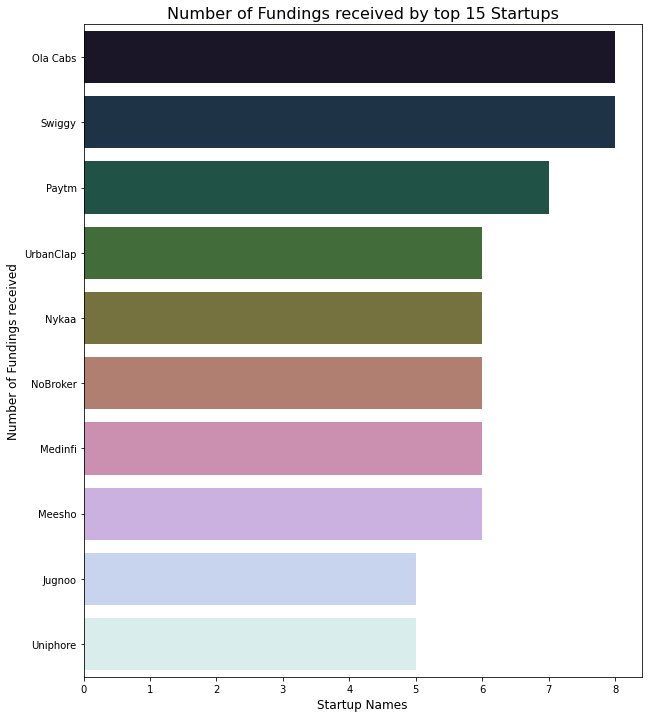

In [28]:
plt.figure(figsize = (10, 12))
sns.barplot(y = most_fundings.index, x = most_fundings.values,palette = "cubehelix")
plt.xticks(rotation = "horizontal")
plt.xlabel("Startup Names", fontsize = 12)
plt.ylabel("Number of Fundings received", fontsize = 12)
plt.title("Number of Fundings received by top 15 Startups", fontsize = 16)

Ola Cabs and Swiggy got the most number of fundings (8)
among all the Startups observed from 2015 to 2020.


Does growth of a startup depend on location?

Data Cleaning

In [30]:
data['City'] = data['City'].replace(('Bengaluru', 'nan', 'Gurugram'), ('Bangalore', 'Bangalore', 'Bangalore'))
city = data['City'].value_counts().head(10)
print(city)

Bangalore    1072
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Ahmedabad      38
Delhi          34
Name: City, dtype: int64


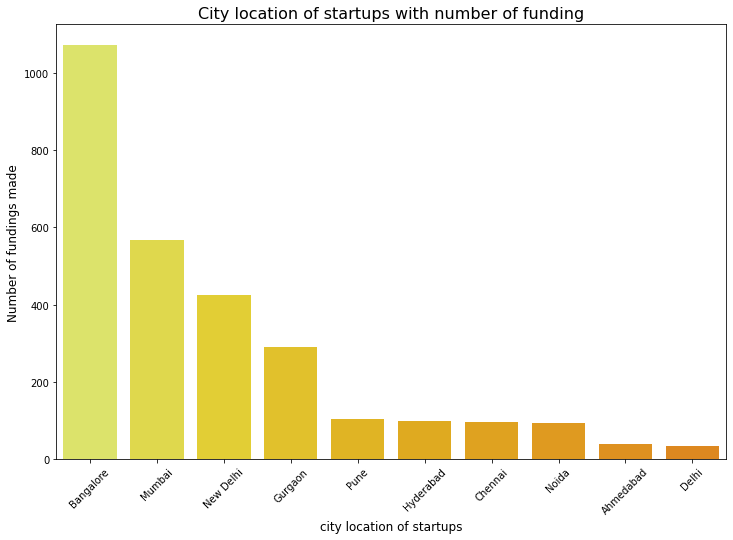

In [31]:
plt.figure(figsize = (12, 8))
sns.barplot(x = city.index, y = city.values, palette = 'Wistia')
plt.xticks(rotation = 45)
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("City location of startups with number of funding", fontsize=16)
plt.show()

Bangalore has seen the highest number of fundings over the course
of the time period at over 1000 fundings. 
Mumbai and Delhi are far off with just under 600 and around 400 fundings respectively.

Preferred industries for startups in India

In [32]:
data[data["IndustryVertical"] == 'nan'].head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD
2873,2874,02/03/2015,TrulyMadly.com,nan,nan,Bangalore,"Helion Venture Partners, Kae Capital",Private Equity,5500000.0
2874,2875,02/03/2015,InstaLively,nan,nan,Bangalore,Group of Angel Investors,Seed Funding,120000.0
2875,2876,03/03/2015,Vserv,nan,nan,Bangalore,"Maverick Capital, IDG Ventures India",Private Equity,15000000.0
2876,2877,03/03/2015,Intruo.com,nan,nan,Bangalore,"Ashutosh Lawania, Alok Goel & others",Seed Funding,-999.0
2877,2878,05/03/2015,Niffler,nan,nan,Bangalore,SAIF Partners,Seed Funding,1000000.0


In [33]:
data['IndustryVertical'] = data['IndustryVertical'].replace('nan', 'Consumer Technology')
data['IndustryVertical'] = data['IndustryVertical'].replace('ECommerce', 'eCommerce')
data['IndustryVertical'] = data['IndustryVertical'].replace('E-Commerce', 'eCommerce')
data['IndustryVertical'] = data['IndustryVertical'].replace('E-commerce', 'eCommerce')
data['IndustryVertical'] = data['IndustryVertical'].replace('Ecommerce', 'eCommerce')
data['IndustryVertical'] = data['IndustryVertical'].replace('Food and Beverage', 'Food & Beverage')

In [34]:
industry_v = data["IndustryVertical"].value_counts().head(10)
industry_v


Consumer Internet      941
Technology             478
eCommerce              296
Consumer Technology    172
Healthcare              70
Finance                 62
Logistics               32
Food & Beverage         29
Education               24
Ed-Tech                 14
Name: IndustryVertical, dtype: int64

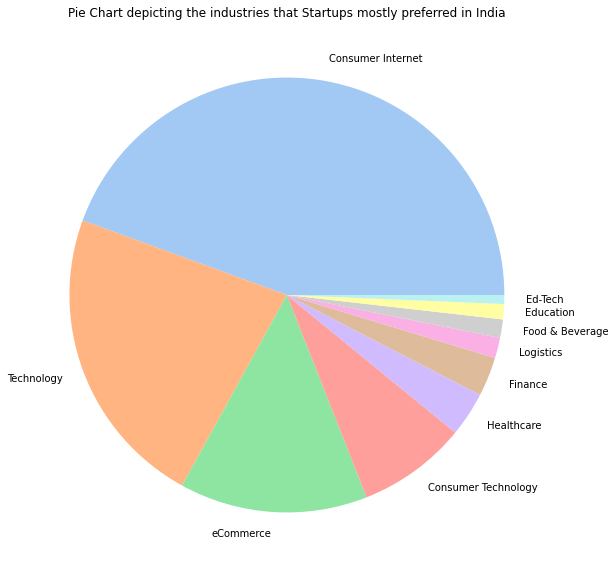

In [36]:
plt.figure(figsize = (10, 10))
plt.pie(industry_v, labels = industry_v.index, colors = sns.color_palette('pastel')[0:10])
plt.title("Pie Chart depicting the industries that Startups mostly preferred in India")
plt.show()




1.   Technology - 23%
2.   Consumer Internet - 44%
3.   eCommerce - 14%



These 3 industries alone account for 81% of the top 10 most preferred industries.

In [37]:
data["SubVertical"].value_counts().head(10)

nan                              936
Online Lending Platform           11
Online Pharmacy                   10
Food Delivery Platform             8
Online Lending                     5
Education                          5
Online lending platform            5
Online Learning Platform           5
Online Education Platform          5
Non-Banking Financial Company      4
Name: SubVertical, dtype: int64

In [38]:
# Reading the subvertical column into a new variable
industry_s = data["SubVertical"].value_counts()[1:].head(20)
industry_s

Online Lending Platform          11
Online Pharmacy                  10
Food Delivery Platform            8
Online Lending                    5
Education                         5
Online lending platform           5
Online Learning Platform          5
Online Education Platform         5
Non-Banking Financial Company     4
Online Food Delivery              4
ECommerce Marketplace             3
Fitness Mobile App                3
Data Analytics platform           3
Online Gifting platform           3
Online Marketplace                3
Online Payment Gateway            3
Logistics                         3
Online Furniture Store            3
Online Food Delivery Platform     3
Agri-tech                         3
Name: SubVertical, dtype: int64

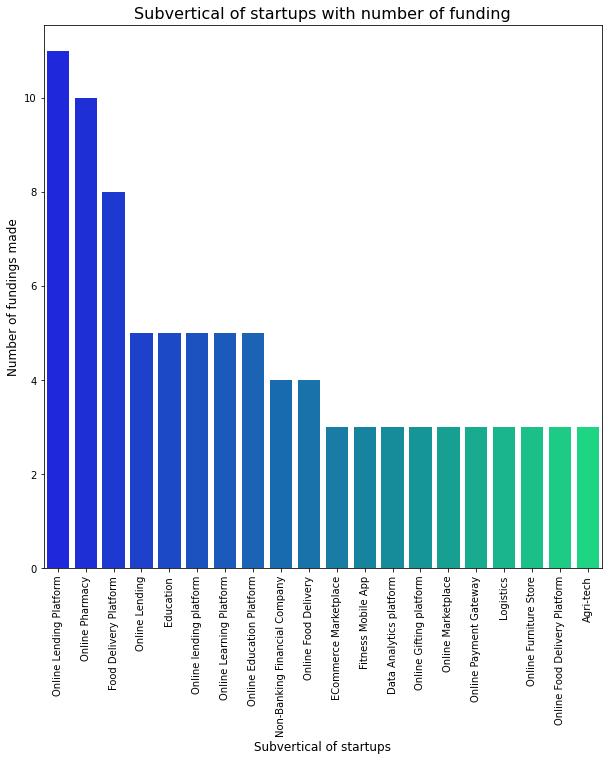

In [39]:
plt.figure(figsize = (10, 10))
sns.barplot(x = industry_s.index, y = industry_s.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

 Online Lending Platform has the highest subvertical among all
major startups in India from 2015 to 2020.

Most important types of funding for startups

In [40]:
data['InvestmentType'] = data['InvestmentType'].replace(('SeedFunding', 'Seed\\nFunding', 'SeedFunding'))
data['InvestmentType'] = data['InvestmentType'].replace(('Seed / Angel Funding', 'Seed/ Angel Funding', 'Seed / Angel Funding'))


In [41]:
investment = data['InvestmentType'].value_counts().head(10)
print(investment)


Private Equity          1451
Seed Funding            1355
Debt Funding              32
Seed\\nFunding            30
Series A                  25
Seed/Angel Funding        23
Series B                  22
Series C                  14
Series D                  12
Angel / Seed Funding       8
Name: InvestmentType, dtype: int64


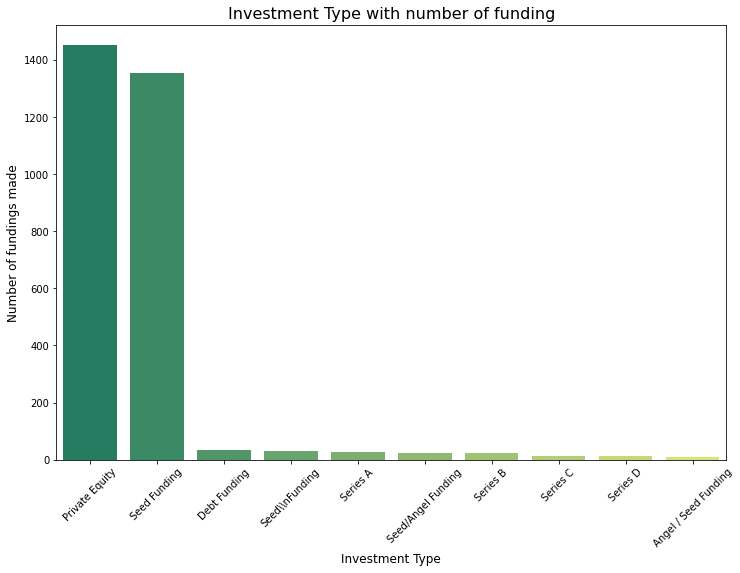

In [42]:
plt.figure(figsize = (12, 8))
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation = 45)
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

 Private Equity and Seed Funding are the most popular
investment types for startups in India in the time period 2015 to 2020.

The change of funding ecosystem with respect to time

In [43]:
# Converting the Date column to Datetime objects using pandas library function
data["YearMonth"] = (pd.to_datetime(data["Date"],
 format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data["Date"],format='%d/%m/%Y').dt.year*100)

In [44]:
data["YearMonth"]


0       404000
1       404000
2       404000
3       404000
4       404000
         ...  
3039    403000
3040    403000
3041    403000
3042    403000
3043    403000
Name: YearMonth, Length: 3044, dtype: int64

In [45]:
d1 = data["YearMonth"].value_counts().sort_values(ascending = False).head(10)
print("No. of fundings per month:\n", d1)

No. of fundings per month:
 403200    993
403000    936
403400    687
403600    310
403800    111
404000      7
Name: YearMonth, dtype: int64


Text(0.5, 1.0, 'Year-Month Distribution')

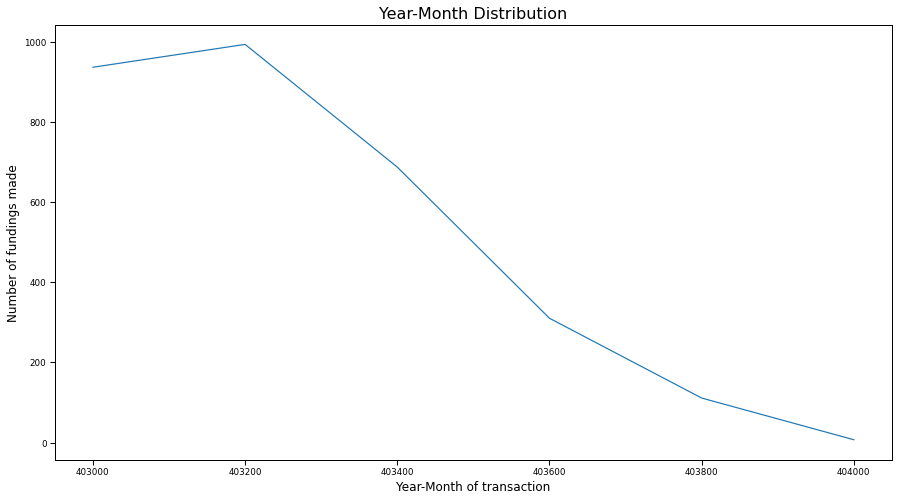

In [46]:
d2 = data["YearMonth"].value_counts()
# Visualization of the number of fundings month-wise
plt.figure(figsize = (15, 8))
sns.set_context('paper')
sns.lineplot(d2.index, d2.values)
plt.xticks(rotation = 0)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)

the number of fundings significantly decreased from the
year 2015 to 2020. 

the number of fundings peaked around early 2016 and hit an all time low around early 2019